<a href="https://colab.research.google.com/github/tiara070403/skripsi/blob/main/preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [6]:
!pip install Sastrawi
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import re
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [8]:
data = pd.read_csv('crawling.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,2,lucu banget mahasiswa pencinta alam ini,1858070162362204643,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/185807016236220...,1716269490936360960,NaN
1,1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,0,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...,1846529554657239219,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/184652955465723...,2544978158,NaN
2,1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,0,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,1844014639350452258,NaN,Leonita_Lestari,in,NaN,0,0,0,https://x.com/undefined/status/184401463935045...,1810821796767375360,NaN
3,1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1836014724523458593,https://pbs.twimg.com/media/GXrVp2Wa0AAv3zG.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183601472452345...,297204645,NaN
4,1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1835164951125917967,https://pbs.twimg.com/media/GXfQzAtacAAlymL.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183516495112591...,297204645,NaN


In [9]:
df = data[['created_at', 'full_text', 'username']]
df

,created_at,full_text,username
0,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini,NaN
1,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...,NaN
2,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,NaN
3,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,NaN
4,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,NaN
...,...,...,...
5344,Fri Feb 21 08:19:20 +0000 2020,Setiap orang di dunia ini bisa menjadi #BeTheH...,NaN
5345,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...,NaN
5346,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,NaN
5347,Fri Feb 21 08:05:51 +0000 2020,Kapolri : Pelestarian Lingkungan merupakan Tan...,NaN


In [10]:
data = pd.read_csv('crawling.csv')
data.head()[['created_at', 'full_text', 'username']]

,created_at,full_text,username
0,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini,NaN
1,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...,NaN
2,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,NaN
3,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,NaN
4,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,NaN


In [11]:
data.dtypes[['created_at', 'full_text', 'username']]

,0
created_at,object
full_text,object
username,float64


In [12]:
data.shape

(5349, 15)

In [13]:
data = data.dropna()
data.isnull().sum()[['created_at', 'full_text', 'username']]

,0
created_at,0
full_text,0
username,0


In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

,0
created_at,0
full_text,0
username,5349


In [16]:
df.shape

(5349, 3)

In [17]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [18]:
df

,created_at,full_text,username
0,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini,NaN
1,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam di Jambi Genjot ...,NaN
2,Wed Oct 09 13:58:44 +0000 2024,Ada Perkoempoelan Pentjinta Alam yang lahir th...,NaN
3,Tue Sep 17 12:09:56 +0000 2024,PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LING...,NaN
4,Sun Sep 15 03:53:14 +0000 2024,PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LING...,NaN
...,...,...,...
5344,Fri Feb 21 08:19:20 +0000 2020,Setiap orang di dunia ini bisa menjadi untuk l...,NaN
5345,Fri Feb 21 08:14:08 +0000 2020,Kapolri pelestarian lingkungan merupakan tangg...,NaN
5346,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,NaN
5347,Fri Feb 21 08:05:51 +0000 2020,Kapolri Pelestarian Lingkungan merupakan Tangg...,NaN


In [19]:
data.shape

(0, 15)

In [20]:
# Definisi fungsi filter_tokens_by_length
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    # Tokenisasi kata
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    # Membuat filter untuk jumlah kata
    mask = (words_count >= min_words) & (words_count <= max_words)
    # Mengaplikasikan filter ke DataFrame
    filtered_df = dataframe[mask]
    return filtered_df

# Menggunakan filter_tokens_by_length untuk mendapatkan baris dengan jumlah kata antara 3 dan 5349
min_words = 3
max_words = 5349
df = filter_tokens_by_length(df, 'full_text', min_words, max_words)

In [21]:
data.describe()

,conversation_id_str,favorite_count,id_str,location,quote_count,reply_count,retweet_count,user_id_str,username
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.head()[['created_at', 'full_text', 'username']]
df

,created_at,full_text,username
0,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini,NaN
1,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam di Jambi Genjot ...,NaN
2,Wed Oct 09 13:58:44 +0000 2024,Ada Perkoempoelan Pentjinta Alam yang lahir th...,NaN
3,Tue Sep 17 12:09:56 +0000 2024,PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LING...,NaN
4,Sun Sep 15 03:53:14 +0000 2024,PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LING...,NaN
...,...,...,...
5344,Fri Feb 21 08:19:20 +0000 2020,Setiap orang di dunia ini bisa menjadi untuk l...,NaN
5345,Fri Feb 21 08:14:08 +0000 2020,Kapolri pelestarian lingkungan merupakan tangg...,NaN
5346,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,NaN
5347,Fri Feb 21 08:05:51 +0000 2020,Kapolri Pelestarian Lingkungan merupakan Tangg...,NaN


In [23]:
data =pd.read_csv("crawling.csv", index_col=0)[['created_at', 'full_text', 'username']]
data

,created_at,full_text,username
conversation_id_str,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini,NaN
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...,NaN
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,NaN
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,NaN
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,NaN
...,...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang di dunia ini bisa menjadi #BeTheH...,NaN
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...,NaN
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,NaN


In [24]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [25]:
#mengubah huruf kecil
data['full_text']=data['full_text'].str.lower()
data.head()

,created_at,full_text,username
conversation_id_str,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini,NaN
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,bejat mahasiswa pencinta alam di jambi 'genjot...,NaN
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@leonita_lestari ada perkoempoelan pentjinta a...,NaN
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...,NaN
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...,NaN


In [26]:
# Normalisasi
norm = {' mikir2 ':' mikir ', 'Perkoempoelan':'perkumpulan', 'SOWAN':'menghadap', 'Bejat':'rusak', 'Pentjinta':'pencinta', 'pecinta':'pencinta', ' siaaapp ':' siap ', 'okaaay ':'oke ', 'udh ':'sudah ','ga ':'tidak ',' gaskeun':' ayo ', 'wowww ':'wow ', ' haaayyuukkk ':' ayo ', ' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

<ipython-input-26-81c8073bf4bd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))


,created_at,full_text,username
0,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini,NaN
1,Wed Oct 16 12:32:07 +0000 2024,rusak Mahasiswa Pencinta Alam di Jambi Genjot ...,NaN
2,Wed Oct 09 13:58:44 +0000 2024,Ada perkumpulan pencinta Alam yang lahir th 19...,NaN
3,Tue Sep 17 12:09:56 +0000 2024,PRESS RELEASE menghadap UKM KE UKM UNIT PANDU ...,NaN
4,Sun Sep 15 03:53:14 +0000 2024,PRESS RELEASE menghadap UKM KE UKM UNIT PANDU ...,NaN
...,...,...,...
5344,Fri Feb 21 08:19:20 +0000 2020,Setiap orang di dunia ini bisa menjadi untuk l...,NaN
5345,Fri Feb 21 08:14:08 +0000 2020,Kapolri pelestarian lingkungan merupakan tangg...,NaN
5346,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,NaN
5347,Fri Feb 21 08:05:51 +0000 2020,Kapolri Pelestarian Lingkungan merupakan Tangg...,NaN


In [27]:

# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

<ipython-input-27-0a4282b86b24>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(lambda x: stopword(x))


,created_at,full_text,username
0,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam,NaN
1,Wed Oct 16 12:32:07 +0000 2024,rusak Mahasiswa Pencinta Alam Jambi Genjot Pak...,NaN
2,Wed Oct 09 13:58:44 +0000 2024,Ada perkumpulan pencinta Alam lahir th 1953 di...,NaN
3,Tue Sep 17 12:09:56 +0000 2024,PRESS RELEASE menghadap UKM KE UKM UNIT PANDU ...,NaN
4,Sun Sep 15 03:53:14 +0000 2024,PRESS RELEASE menghadap UKM KE UKM UNIT PANDU ...,NaN


In [28]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[lucu, banget, mahasiswa, pencinta, alam]"
1,"[rusak, Mahasiswa, Pencinta, Alam, Jambi, Genj..."
2,"[Ada, perkumpulan, pencinta, Alam, lahir, th, ..."
3,"[PRESS, RELEASE, menghadap, UKM, KE, UKM, UNIT..."
4,"[PRESS, RELEASE, menghadap, UKM, KE, UKM, UNIT..."
...,...
5344,"[Setiap, orang, dunia, bisa, menjadi, lingkung..."
5345,"[Kapolri, pelestarian, lingkungan, merupakan, ..."
5346,"[Pelestarian, Lingkungan, Merupakan, Tanggung,..."
5347,"[Kapolri, Pelestarian, Lingkungan, merupakan, ..."


In [31]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/datahasil_preprocessingData.csv", index=False)
data_clean = pd.read_csv("/content/datahasil_preprocessingData.csv", encoding='latin1')

Output streaming akan dipotong hingga 5000 baris terakhir.
babinsa tente latih survival ilmu medan mahasiswa cinta alam
jampe2kan aku jadi apa mahasiswa cinta alam
kalau org buang sampah sembarang tuh hrus diapain y
bengkulu 0303 upacara buka ingat hut ke35 kelompok aktifitas mahasiswa cinta alam kampala fakultas tani universitas bengkulu turut hadir bpk eghbert elvan ampou brol
mahasiswa cinta alam aranyacala trisakti ada acara seru banget fun bazaar mural art competition bouldering challenge music night akan riah danilla endahnrhesa buat kamu cinta alam cinta musik indie yuk beli tiket
mahasiswa cinta alam ighopala audensi dengan dprd cilacap kait ker lewat
mahasiswa cinta alam ighopala audensi dengan dprd cilacap kait rusa lingkung hidup lalu
muktamar kenal medan kex ptkain indonesia mahasiswa islam cinta alam mahiscita iain kendari tema bangsa tanah air
cegah banjir mahasiswa cinta alam laku hijau siar pers
cegah banjir mahasiswa cinta alam laku hijau siar pers
cegah banjir mahasis

In [34]:
data.shape

(5349, 3)

In [35]:
data_clean.head()

,full_text
0,lucu banget mahasiswa cinta alam
1,rusak mahasiswa cinta alam jambi genjot paksa ...
2,ada kumpul cinta alam lahir th 1953 diri awibo...
3,press release hadap ukm ke ukm unit pandu ling...
4,press release hadap ukm ke ukm unit pandu ling...


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [39]:
df = pd.read_csv('/content/datahasil_preprocessingData.csv')
df

,full_text
0,lucu banget mahasiswa cinta alam
1,rusak mahasiswa cinta alam jambi genjot paksa ...
2,ada kumpul cinta alam lahir th 1953 diri awibo...
3,press release hadap ukm ke ukm unit pandu ling...
4,press release hadap ukm ke ukm unit pandu ling...
...,...
5232,tiap orang dunia bisa jadi lingkung sekitar te...
5233,kapolri lestari lingkung rupa tanggung jawab m...
5234,lestari lingkung rupa tanggung jawab moral kit...
5235,kapolri lestari lingkung rupa tanggung jawab m...


In [40]:
# Load sentiment classifier
classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Fungsi prediksi sentimen
def prediksi_sentimen(teks):
    hasil = classifier(teks)
    # hasil berupa list dict: [{'label': 'POS', 'score': 0.99}]
    return hasil[0]['label']

# Terapkan ke kolom cleaned_text (ini akan butuh waktu karena 11k data)
df['sentimen'] = df['full_text'].apply(prediksi_sentimen)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [41]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
neutral,2763
positive,1589
negative,885


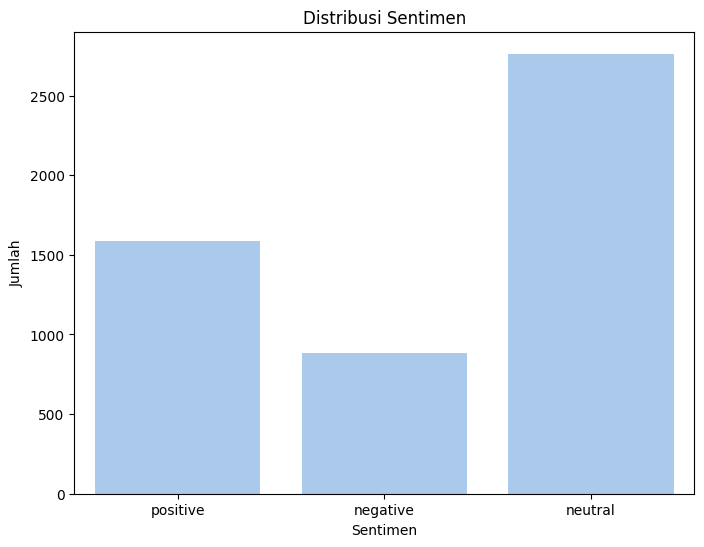

In [42]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [43]:
data_negatif = df[df['sentimen'] == 'negative']
data_positif = df[df['sentimen'] == 'positive']
data_netral = df[df['sentimen'] == 'neutral']

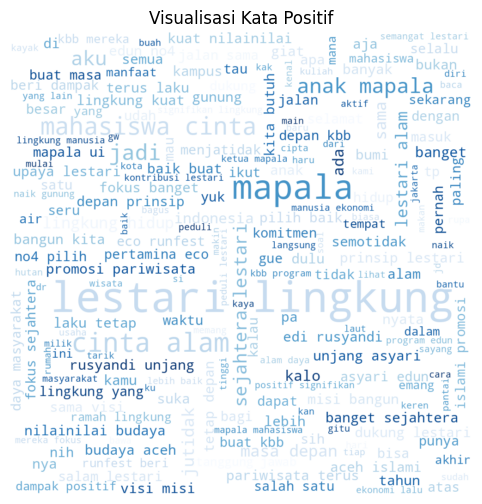

In [44]:
all_text_s1 = ' '.join(word for word in data_positif["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
X=df.full_text
y=df.sentimen

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [48]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 4189
Banyak data x_test  : 1048
Banyak data y_train : 4189
Banyak data y_test  : 1048


TRAINING DATA

In [49]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [50]:
from sklearn.naive_bayes import MultinomialNB

clf1 = MultinomialNB()

In [51]:
model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

In [52]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [53]:
hasil1=model1.predict(x_test)

In [54]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    negative       0.73      0.10      0.18       184
     neutral       0.64      0.95      0.77       548
    positive       0.65      0.43      0.52       316

    accuracy                           0.65      1048
   macro avg       0.68      0.50      0.49      1048
weighted avg       0.66      0.65      0.59      1048



TESTING

In [55]:
def classify_text(input_text):
    models = [
        ('MultinomialNB', model_multinomialNaiveBayes)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [56]:
model_multinomialNaiveBayes = model1.fit(x_train, y_train)

In [57]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: mapala baik
Input kata : mapala baik

Hasil Klasifikasi:
MultinomialNB: positive


In [60]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: pencemaran lingkungan
Input kata : pencemaran lingkungan

Hasil Klasifikasi:
MultinomialNB: neutral
